In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')
df.shape

(7429, 10790)

In [6]:
NUM_LABEL_COLS = 13

In [4]:
df_filtered = df
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']
df_filtered = df_filtered[df_filtered['trmp'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']

In [7]:
sax = df_filtered
sax['sax'] = sax[['sop', 'alto', 'tenr', 'tora', 'bari']].max(axis=1)

num_x_cols = sax.shape[1] - NUM_LABEL_COLS - 2
# ^ last bit to adjust for zero indexing
data = sax.iloc[:, 1:num_x_cols].to_numpy()
# ^ these are the features (we start at 1 to leave out track name)
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
target = sax['sax'].to_numpy().ravel()  

pca = PCA(n_components=2)
pca.fit(data)
d = pca.transform(data)

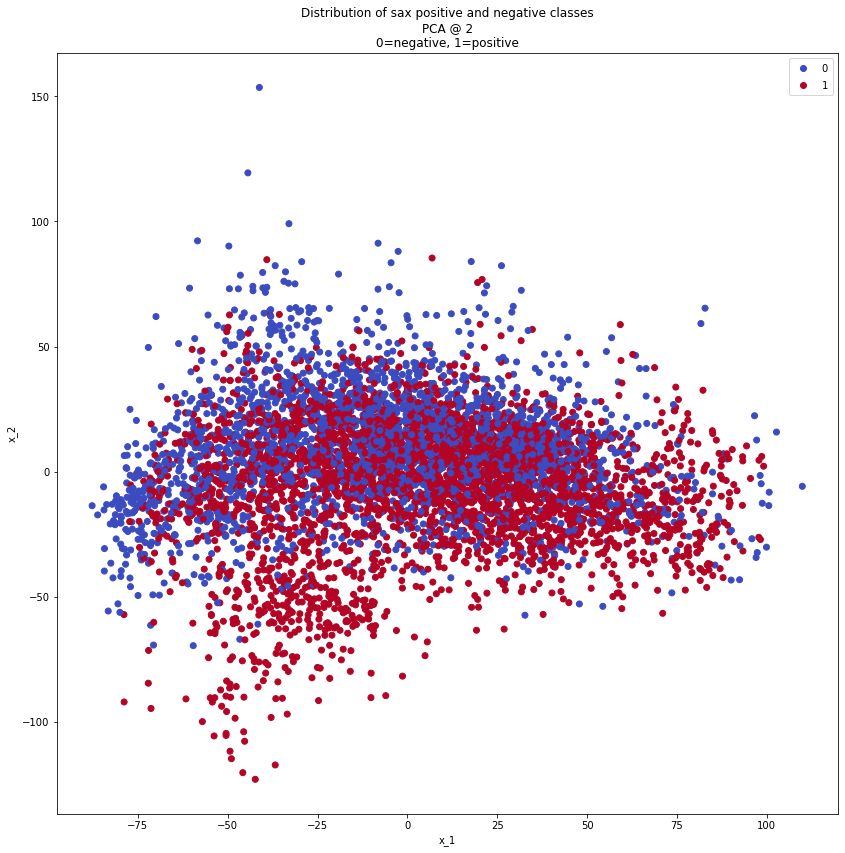

In [18]:
fig = plt.figure(figsize=(14, 14))
s = plt.scatter(d[:, 0], d[:, 1], c=target)
s.set_cmap('coolwarm')
plt.legend(*s.legend_elements())
plt.title('Distribution of sax positive and negative classes\nPCA @ 2\n0=negative, 1=positive')
plt.xlabel('x_1')
plt.ylabel('x_2')
fig.savefig('sax_vs_bg.jpg')